In [1]:
from sriApp.modelos.boolean_model import BooleanModel
from sriApp.modelos.boolean_model import DIR
from ir_datasets import load
from sriApp.modelos.SortedValueDataSet import normalize
import matplotlib.pyplot as plt
import statistics as stat
from medidas import *

In [2]:
datasets = {
    "beir/arguana": {'count': 8674},
    #"beir/dbpedia-entity": {'count': 4635922},
    "beir/fiqa": {'count': 57638},
    "beir/cqadupstack/android": {'count': 22998},
    "beir/cqadupstack/english": {'count': 40221},
    "beir/cqadupstack/gaming": {'count': 45301},
    "beir/cqadupstack/gis": {'count': 37637},
    "beir/cqadupstack/mathematica": {'count': 16705},
    "beir/cqadupstack/physics": {'count': 38316},
    "beir/cqadupstack/programmers": {'count': 32176},
    "beir/cqadupstack/stats": {'count': 42269},
    "beir/cqadupstack/tex": {'count': 68184},
    "beir/cqadupstack/unix": {'count': 47382},
    "beir/cqadupstack/webmasters": {'count': 17405},
    "beir/cqadupstack/wordpress": {'count': 48605},
    "cranfield":{'count': 0},
}

In [3]:
dataset_name = "beir/cqadupstack/mathematica"
boolean_model = BooleanModel(dataset_name)

CARGADO Modelo Booleano


In [4]:
def normalize_bool_querie(querie):
    tokens = list(normalize(querie))
    if len(tokens) == 0:
        return 'i', 'i'
    querie_and = tokens[0]
    querie_or = tokens[0]
    for token in tokens[1:]:
        querie_and += ' & ' + token
        querie_or += ' | ' + token
    return querie_and, querie_or

In [5]:
dataset = load(dataset_name)
queries_and = []
queries_or = []
#index = 1
for querie in dataset.queries_iter():
    querie_and, querie_or = normalize_bool_querie(querie.text)
    queries_and.append((querie_and, int(querie.query_id)))
    queries_or.append((querie_or, int(querie.query_id)))
    #index+=1

In [6]:
queries_or

[('use | automorphisms | graph', 35544),
 ('problem | function | n', 55292),
 ('deleteduplicatesby | performing | d | hoped | missing | something', 55294),
 ('integration | region | given | inequality', 19392),
 ('view | code | cdf | demonstration', 48026),
 ('loglinearplot | analog | plot3d', 25061),
 ('hide | mathkernel | tab | taskbar | using | c', 43874),
 ('using | result | solve | subsequent | calculation', 6796),
 ('ordering | term | expression', 46136),
 ('limit | calculation | step | step', 37414),
 ('generating | partition | set | specified | size | part', 25285),
 ('preventing | cell | height | adjustment | rotating | 3d | graphic', 25282),
 ('plotting | complex | number', 16252),
 ('importing | zip | file', 16259),
 ('dynamic | chart | element | bar | chart', 16258),
 ('possible | change | color | plot | show', 17250),
 ('simple | subtraction | question', 46702),
 ('cause | strange | line | artifact | appear | plot | certain | plotranges',
  24882),
 ('compute | real | part

In [7]:
responses_and = {}
for q in queries_and:
    responses_and[int(q[1])] = boolean_model.SearchIndex(q[0])

AttributeError: 'NoneType' object has no attribute 'keys'

In [ ]:
responses_and

{82449: [],
 146540: [],
 46138: [],
 46793: [],
 46792: [],
 45445: [],
 46861: [],
 158717: [],
 90314: [],
 176686: [],
 62089: [],
 44422: [],
 27617: [],
 8540: [233],
 149849: [],
 119040: [21536, 27170, 29531],
 66505: [],
 65266: [],
 392: [27331, 280, 281, 282, 283, 284],
 93137: [],
 167615: [6274, 23162, 35942],
 60016: [],
 146317: [],
 146315: [],
 19975: [],
 102361: [],
 9750: [370],
 24148: [],
 11849: [384],
 136583: [],
 92601: [20296, 41675],
 103707: [12872, 19100, 36272],
 145772: [],
 35219: [463],
 145776: [],
 35217: [468, 469],
 35211: [2985, 473, 24197, 19423],
 136325: [2265, 32179],
 96668: [],
 177486: [],
 180006: [],
 144588: [],
 134095: [24565, 42527],
 38565: [33333],
 70139: [],
 69176: [],
 18895: [582],
 87293: [590],
 87124: [27937, 10082, 36388, 37196, 24621, 36151, 3737, 28190, 36159],
 178477: [],
 174116: [],
 147878: [],
 126668: [],
 68529: [673],
 155463: [704, 703],
 75055: [],
 5862: [732],
 56840: [735],
 17359: [],
 120087: [],
 35641: [

In [ ]:
responses_or = {}
for q in queries_or:
    responses_or[int(q[1])] = boolean_model.SearchIndex(q[0])

In [ ]:
new_qrels = {}
for qrel in dataset.qrels_iter():
    
    s = new_qrels.get(qrel.query_id, set())
    s.add(int(qrel.doc_id))
    new_qrels[int(qrel.query_id)] = s

In [ ]:
new_qrels

{82449: {53562},
 146540: {146242},
 46138: {163195},
 46793: {35871},
 46792: {35026},
 45445: {41370},
 46861: {44212},
 158717: {135850},
 90314: {86054},
 176686: {170750},
 62089: {152192},
 44422: {42962},
 27617: {10221},
 8540: {86243},
 149849: {143921},
 119040: {87723},
 66505: {66359},
 65266: {62421},
 392: {20906},
 93137: {114054},
 167615: {137288},
 60016: {60443},
 146317: {146846},
 146315: {143006},
 19975: {8711},
 102361: {67690},
 9750: {103166},
 24148: {48457},
 11849: {13182},
 136583: {153437},
 92601: {119569},
 103707: {102855},
 145772: {12817},
 35219: {36786},
 145776: {106916},
 35217: {35395},
 35211: {52282},
 136325: {120982},
 96668: {130537},
 177486: {98861},
 180006: {178726},
 144588: {147538},
 134095: {133145},
 38565: {149017},
 70139: {79246},
 69176: {128032},
 18895: {30197},
 87293: {89001},
 87124: {64655},
 178477: {133741},
 174116: {115096},
 147878: {60896},
 126668: {126597},
 68529: {71127},
 155463: {150917},
 75055: {71402},
 586

In [ ]:
new_qrels = {}
for qrel in dataset.qrels_iter():
    print(qrel)
    break
    if qrel.relevance > 0:
        s = new_qrels.get(int(qrel.query_id), set())
        s.add(int(qrel.doc_id))
        new_qrels[int(qrel.query_id)] = s

TrecQrel(query_id='82449', doc_id='53562', relevance=1, iteration='0')


In [ ]:
m_or    = get_medidas(responses_or, new_qrels)
m_and    = get_medidas(responses_and, new_qrels)

In [ ]:
r_or, a_or = get_recall_accuracy(m_or)
r_and, a_and = get_recall_accuracy(m_and)

0.041379310344827586 5.767263543608085e-06


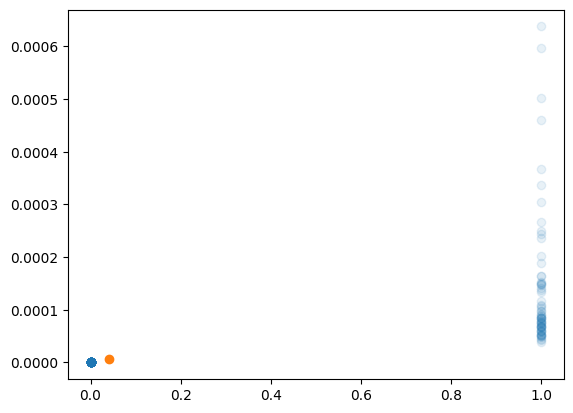

In [ ]:
plot_recall_accuracy(r_or,a_or)

0.0 0.0


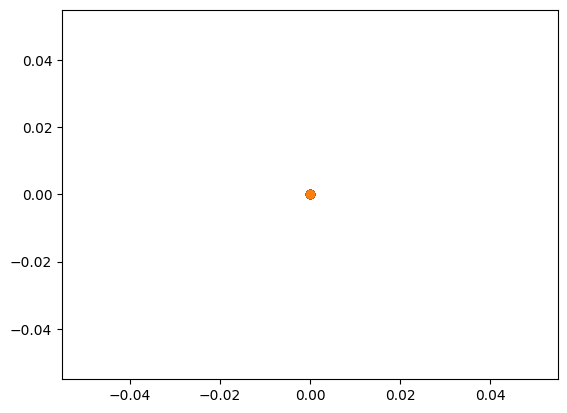

In [ ]:
plot_recall_accuracy(r_and,a_and)

0.041379310344827586 5.767263543608085e-06
0.0 0.0


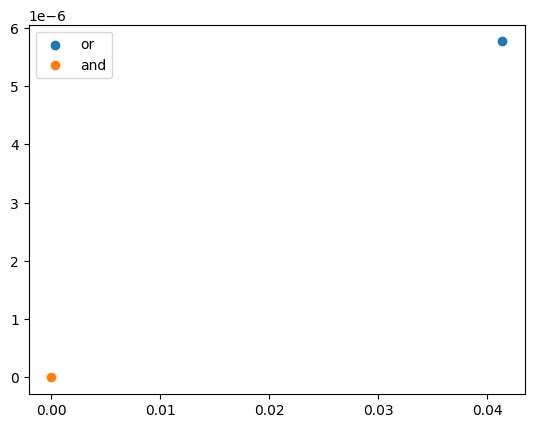

In [ ]:
medidas = [
    (r_or, a_or),
    (r_and, a_and),
]
names= ['or', 'and']
plot_means(medidas, names)